#IPL MATCH ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
match_df = pd.read_csv("matches.csv")
match_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [3]:
dlvr_df = pd.read_csv("deliveries.csv")
dlvr_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


# EDA

In [5]:
match_df['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [6]:
match_df['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

## checking for null values

In [7]:
match_df[match_df['winner'].isnull()== True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [8]:
##replacing null results
match_df['winner'].fillna('Draw',inplace=True)

In [9]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             756 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [10]:
team_encoding = {
    'Mumbai Indians': 1,
    'Kolkata Knight Riders':2,
    'Royal Challengers Bangalore':3,
    'Deccan Chargers' :4,
    'Chennai Super Kings':5,
    'Rajasthan Royals':6,
    'Delhi Daredevils':7,
    'Gujarat Lions':8,
    'Kings XI Punjab':9,
    'Sunrisers Hyderabad':10,
    'Rising Pune Supergiants':11,
    'Rising Pune Supergiant':11,
    'Kochi Tuskers Kerala':12,
    'Pune Warriors':13,
    'Delhi Capitals':14,
    'Draw':15
}
team_encode_dict = {
    'team1':team_encoding,
    'team2':team_encoding,
    'toss_winner':team_encoding,
    'winner':team_encoding,
}
match_df.replace(team_encode_dict, inplace =True)
match_df.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,8,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,11,9,9,field,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,3,7,3,bat,normal,0,3,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,8,10,10,field,normal,0,10,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,2,1,1,field,normal,0,1,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,3,9,3,bat,normal,0,9,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,7,11,11,field,normal,0,7,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,10,1,1,field,normal,0,1,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [11]:
##missing values in city col
match_df['city'].value_counts() 

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Port Elizabeth      7
Ranchi              7
Cape Town           7
Cuttack             7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
East London         3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

In [12]:
match_df[match_df['city'].isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [13]:
match_df['city'].fillna('Dubai',inplace=True)
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               756 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             756 non-null int64
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(6), object(12)
memory usage: 106.4+ KB


In [14]:
match_df.describe()

,id,season,dl_applied,winner,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,5.416667,13.283069,3.350529
std,3464.478148,3.366895,0.156630,3.421736,23.471144,3.387963
min,1.000000,2008.000000,0.000000,1.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,2.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,5.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,8.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,15.000000,146.000000,10.000000


In [15]:
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,8,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,11,9,9,field,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,3,7,3,bat,normal,0,3,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [16]:
match_df['team1'].value_counts()

1     101
9      91
5      89
3      85
2      83
7      72
6      67
10     63
4      43
13     20
11     15
8      14
12      7
14      6
Name: team1, dtype: int64

In [17]:
match_df['team1']=match_df['team1'].astype(int)
match_df['team2']=match_df['team2'].astype(int)
match_df['toss_winner']=match_df['toss_winner'].astype(int)
match_df.describe()

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,5.554233,5.604497,5.462963,0.025132,5.416667,13.283069,3.350529
std,3464.478148,3.366895,3.389656,3.411850,3.361638,0.156630,3.421736,23.471144,3.387963
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,189.750000,2011.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000
50%,378.500000,2013.000000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,4.000000
75%,567.250000,2016.000000,9.000000,8.000000,8.000000,0.000000,8.000000,19.000000,6.000000
max,11415.000000,2019.000000,14.000000,14.000000,14.000000,1.000000,15.000000,146.000000,10.000000


In [18]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               756 non-null object
date               756 non-null object
team1              756 non-null int32
team2              756 non-null int32
toss_winner        756 non-null int32
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             756 non-null int64
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int32(3), int64(6), object(9)
memory usage: 97.6+ KB


## toss winn and match wins by each team

In [19]:
toss_wins = match_df['toss_winner'].value_counts(sort=True)
match_wins = match_df['winner'].value_counts(sort=True)
for idx,val in match_wins.iteritems():
    print(f"{list(team_encode_dict['winner'].keys())[idx-1]}->{toss_wins[idx]}")

Mumbai Indians->98
Chennai Super Kings->89
Kolkata Knight Riders->92
Royal Challengers Bangalore->81
Kings XI Punjab->81
Rajasthan Royals->80
Delhi Daredevils->80
Sunrisers Hyderabad->46
Deccan Chargers->43
Rising Pune Supergiants->13
Gujarat Lions->15
Kochi Tuskers Kerala->20
Pune Warriors->10
Rising Pune Supergiant->8


KeyError: 15

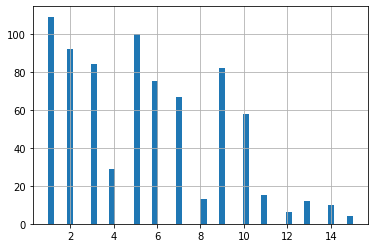

In [20]:
match_df['winner'].hist(bins=50)

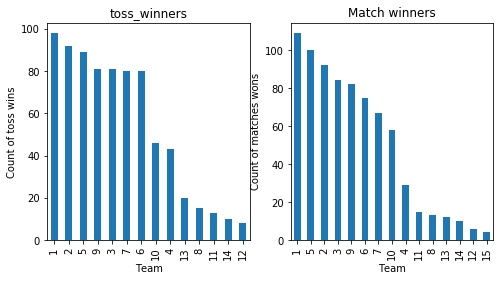

In [21]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss_winners")
toss_wins.plot(kind='bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Team')
ax2.set_ylabel('Count of matches wons')
ax2.set_title("Match winners")
match_wins.plot(kind='bar')

In [22]:
match_df.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## Dropping the redundant colums

In [23]:
match_df = match_df[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
match_df

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11
2,8,2,Rajkot,field,2,Saurashtra Cricket Association Stadium,2
3,11,9,Indore,field,9,Holkar Cricket Stadium,9
4,3,7,Bangalore,bat,3,M Chinnaswamy Stadium,3
...,...,...,...,...,...,...,...
751,2,1,Mumbai,field,1,Wankhede Stadium,1
752,5,1,Chennai,bat,5,M. A. Chidambaram Stadium,1
753,10,14,Visakhapatnam,field,14,ACA-VDCA Stadium,14
754,14,5,Visakhapatnam,field,5,ACA-VDCA Stadium,5


In [24]:
from sklearn.preprocessing import LabelEncoder
ftr_list = ['city','toss_decision','venue']
encoder = LabelEncoder()
for ftr in ftr_list:
    match_df[ftr] = encoder.fit_transform(match_df[ftr])
    print(encoder.classes_)
    
match_df

['Abu Dhabi' 'Ahmedabad' 'Bangalore' 'Bengaluru' 'Bloemfontein'
 'Cape Town' 'Centurion' 'Chandigarh' 'Chennai' 'Cuttack' 'Delhi'
 'Dharamsala' 'Dubai' 'Durban' 'East London' 'Hyderabad' 'Indore' 'Jaipur'
 'Johannesburg' 'Kanpur' 'Kimberley' 'Kochi' 'Kolkata' 'Mohali' 'Mumbai'
 'Nagpur' 'Port Elizabeth' 'Pune' 'Raipur' 'Rajkot' 'Ranchi' 'Sharjah'
 'Visakhapatnam']
['bat' 'field']
['ACA-VDCA Stadium' 'Barabati Stadium' 'Brabourne Stadium' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dubai International Cricket Stadium' 'Eden Gardens' 'Feroz Shah Kotla'
 'Feroz Shah Kotla Ground' 'Green Park'
 'Himachal Pradesh Cricket Association Stadium' 'Holkar Cricket Stadium'
 'IS Bindra Stadium' 'JSCA International Stadium Complex' 'Kingsmead'
 'M Chinnaswamy Stadium' 'M. A. Chidambaram Stadium'
 'M. Chinnaswamy Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Maharashtra Cricket Association Stadium' 'Nehru Stadium'
 'New 

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,15,1,3,28,10
1,1,11,27,1,11,21,11
2,8,2,29,1,2,31,2
3,11,9,16,1,9,13,9
4,3,7,2,0,3,17,3
...,...,...,...,...,...,...,...
751,2,1,24,1,1,40,1
752,5,1,8,0,5,18,1
753,10,14,32,1,14,0,14
754,14,5,32,1,5,0,5


##Machine learning

In [25]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(match_df, test_size = 0.2, random_state=5)
print(train_df.shape)
print(test_df.shape)

(604, 7)
(152, 7)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

def print_model_scores(model, data, predictor, target):
    model.fit(data[predictor], data[target])
    predictions = model.predict(data[predictor])
    accuracy = accuracy_score(predictions,data[target])
    print('Accuracy: %s' % '{0:.2}'.format(accuracy))
    scores = cross_val_score(model, data[predictor], data[target], scoring="neg_mean_squared_error", cv=5 )
    print('Cross-Validation Scores: {}'.format(np.sqrt(-scores)))
    print(f'Average RMSE: {np.sqrt(-scores).mean()}')

In [27]:
##logistic regression
target_var = ["winner"]
predictor_var = ['team1','team2','city','toss_winner','toss_decision','venue']
model = LogisticRegression()

print_model_scores(model, train_df, predictor_var, target_var)

Accuracy: 0.32
Cross-Validation Scores: [3.69826518 3.50690563 3.46291832 3.24298461 3.36036239]
Average RMSE: 3.454287225275278


In [28]:
##random forest classifier
model = RandomForestClassifier(n_estimators=100)
print_model_scores(model, train_df, predictor_var,target_var)

Accuracy: 0.89
Cross-Validation Scores: [3.6511243  3.72978422 3.64061785 3.14481009 3.68325558]
Average RMSE: 3.5699184094877836


In [29]:
team1 = 'Mumbai Indians'
team2 = 'Sunrisers Hyderabad'
toss_winner = 'Sunrisers Hyderabad'
inp = [team_encode_dict['team1'][team1],team_encode_dict['team2'][team2],'14',team_encode_dict['toss_winner'][toss_winner],'2','1']
print(inp)
inp = np.array(inp).reshape((1,-1))
print(inp)
output=model.predict(inp)
print(output)
print(f"The winner would be: {list(team_encoding.keys())[list(team_encode_dict['team1'].values()).index(output)]}")

[1, 10, '14', 10, '2', '1']
[['1' '10' '14' '10' '2' '1']]
[1]
The winner would be: Mumbai Indians


In [30]:
pd.Series(index=predictor_var, data=model.feature_importances_)

team1            0.220347
team2            0.243516
city             0.156228
toss_winner      0.166883
toss_decision    0.031599
venue            0.181427
dtype: float64

 ## adding complexity to analysis

In [31]:
batsman_grp = dlvr_df.groupby(['match_id', 'batting_team'])
batsmen = batsman_grp['batsman_runs'].sum().reset_index()
batsmen

,match_id,batting_team,batsman_runs
0,1,Royal Challengers Bangalore,166
1,1,Sunrisers Hyderabad,200
2,2,Mumbai Indians,176
3,2,Rising Pune Supergiant,183
4,3,Gujarat Lions,179
...,...,...,...
1505,11413,Sunrisers Hyderabad,162
1506,11414,Chennai Super Kings,151
1507,11414,Delhi Capitals,147
1508,11415,Chennai Super Kings,148


In [32]:
match = pd.read_csv("matches.csv")
match = match[match['winner'].isnull()!=True]
teams = match.groupby(['id','team1','team2'])['winner'].sum().reset_index()
teams['id']

0          1
1          2
2          3
3          4
4          5
       ...  
747    11347
748    11412
749    11413
750    11414
751    11415
Name: id, Length: 752, dtype: int64

In [33]:
append_dict = {'match_id' : list(teams['id']),
              'team1' :list(teams['team2']),
              'team2' :list(teams['team1']),
              'team1_score':[],
              'team2_score':[],
              'winner':list(teams['winner'])
              }

for match_id, team in zip(list(teams['id']), list(teams['team1'])):
    append_dict['team1_score'].append(int(batsmen.query('match_id==@match_id and batting_team == @team')['batsman_runs']))
for match_id, team in zip(list(teams['id']), list(teams['team2'])):
    append_dict['team2_score'].append(int(batsmen.query('match_id==@match_id and batting_team == @team')['batsman_runs']))

df = pd.DataFrame(append_dict)

In [34]:
df

,match_id,team1,team2,team1_score,team2_score,winner
0,1,Royal Challengers Bangalore,Sunrisers Hyderabad,200,166,Sunrisers Hyderabad
1,2,Rising Pune Supergiant,Mumbai Indians,176,183,Rising Pune Supergiant
2,3,Kolkata Knight Riders,Gujarat Lions,179,169,Kolkata Knight Riders
3,4,Kings XI Punjab,Rising Pune Supergiant,157,154,Kings XI Punjab
4,5,Delhi Daredevils,Royal Challengers Bangalore,151,137,Royal Challengers Bangalore
...,...,...,...,...,...,...
747,11347,Mumbai Indians,Kolkata Knight Riders,133,134,Mumbai Indians
748,11412,Mumbai Indians,Chennai Super Kings,131,132,Mumbai Indians
749,11413,Delhi Capitals,Sunrisers Hyderabad,162,165,Delhi Capitals
750,11414,Chennai Super Kings,Delhi Capitals,147,151,Chennai Super Kings


In [35]:
team_encoding = {
    'Mumbai Indians': 1,
    'Kolkata Knight Riders':2,
    'Royal Challengers Bangalore':3,
    'Deccan Chargers' :4,
    'Chennai Super Kings':5,
    'Rajasthan Royals':6,
    'Delhi Daredevils':7,
    'Gujarat Lions':8,
    'Kings XI Punjab':9,
    'Sunrisers Hyderabad':10,
    'Rising Pune Supergiants':11,
    'Rising Pune Supergiant':11,
    'Kochi Tuskers Kerala':12,
    'Pune Warriors':13,
    'Delhi Capitals':14,
    'Draw':15
}
team_encode_dict = {
    'team1':team_encoding,
    'team2':team_encoding,
    'toss_winner':team_encoding,
    'winner':team_encoding,
}
df.replace(team_encode_dict, inplace =True)
df.head(10)

,match_id,team1,team2,team1_score,team2_score,winner
0,1,3,10,200,166,10
1,2,11,1,176,183,11
2,3,2,8,179,169,2
3,4,9,11,157,154,9
4,5,7,3,151,137,3
5,6,10,8,132,137,10
6,7,1,2,169,168,1
7,8,9,3,144,144,9
8,9,11,7,197,103,7
9,10,1,10,147,155,1


In [41]:
match_df.head(10)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,15,1,3,28,10
1,1,11,27,1,11,21,11
2,8,2,29,1,2,31,2
3,11,9,16,1,9,13,9
4,3,7,2,0,3,17,3
5,8,10,15,1,10,28,10
6,2,1,24,1,1,40,1
7,3,9,16,0,3,13,9
8,7,11,27,1,11,21,7
9,10,1,24,1,1,40,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 6 columns):
match_id       752 non-null int64
team1          752 non-null object
team2          752 non-null object
team1_score    752 non-null int64
team2_score    752 non-null int64
winner         752 non-null object
dtypes: int64(3), object(3)
memory usage: 35.4+ KB


In [39]:
df['team1']=df['team1'].astype(int)
df['team2']=df['team2'].astype(int)
df['winner']=df['winner'].astype(int)
df.info()
cols_to_use = match_df.columns.difference(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 6 columns):
match_id       752 non-null int64
team1          752 non-null int32
team2          752 non-null int32
team1_score    752 non-null int64
team2_score    752 non-null int64
winner         752 non-null int32
dtypes: int32(3), int64(3)
memory usage: 26.6 KB


In [40]:
cols_to_use

Index(['city', 'toss_decision', 'toss_winner', 'venue'], dtype='object')

In [38]:
merged_df = pd.merge(df, match_df[cols_to_use], left_on='match_id', right_on='id',how='outer')
merged_df = merged_df.dropna()
merged_df = merged_df.drop('id', axis=1)

KeyError: 'id'

In [ ]:
merged_df

In [ ]:
def categorize(val):
    if val < 50:
        return 1
    elif val>=50 and val<100:
        return 2
    elif val>=100 and val<150:
        return 3
    elif val>=150 and val<200:
        return 4
    else:
        return 5

cols = ['team1_score','team2_score']
for col in cols:
    merged_df[col] = merged_df[col].apply(categorize)
    
merged_df
    

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
ax = sns.heatmap(merged_df.corr(), annot = True)